In [7]:
import os

import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss


In [8]:
SIM_NAME = 66
PATH = ".../aiornot"
N_SAMPLES = 12

In [9]:
# Load OOFs
oofs = pd.read_csv(os.path.join(PATH, "outs", "oofs", f"sim_{SIM_NAME}", "oofs.csv"))
oofs["dif"] = oofs["label"] - oofs["preds"]
oofs["abs_dif"] = np.abs(oofs["label"] - oofs["preds"])

worst_cases = oofs.sort_values(by="abs_dif", ascending=False).iloc[0:N_SAMPLES,:]
best_cases = oofs.sort_values(by="abs_dif", ascending=True).iloc[0:N_SAMPLES,:]

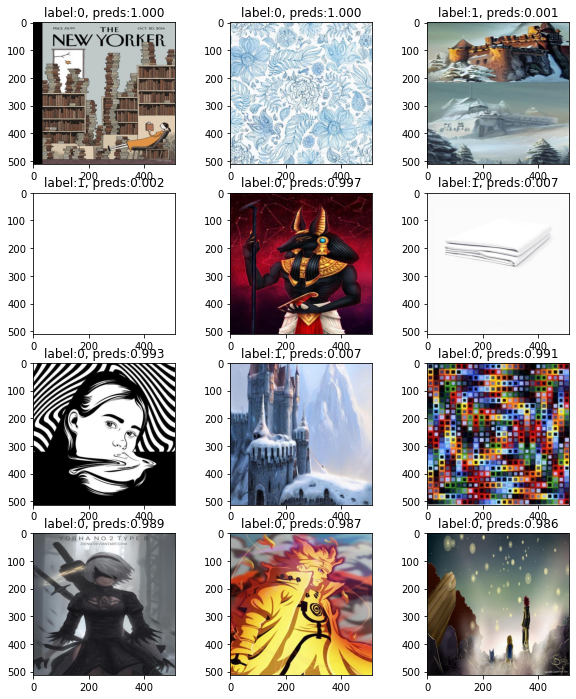

In [10]:
# Worst cases
fig, ax = plt.subplots(N_SAMPLES//3, 3, figsize=(10,12))
ax = ax.reshape(-1)

for k,row in enumerate(worst_cases.iterrows()):
    image = cv2.imread(row[1]["img_path"])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label = row[1]["label"]
    preds = row[1]["preds"]
    ax[k].imshow(image)
    ax[k].set_title(f"label:{label}, preds:{preds:.3f}")
plt.show()

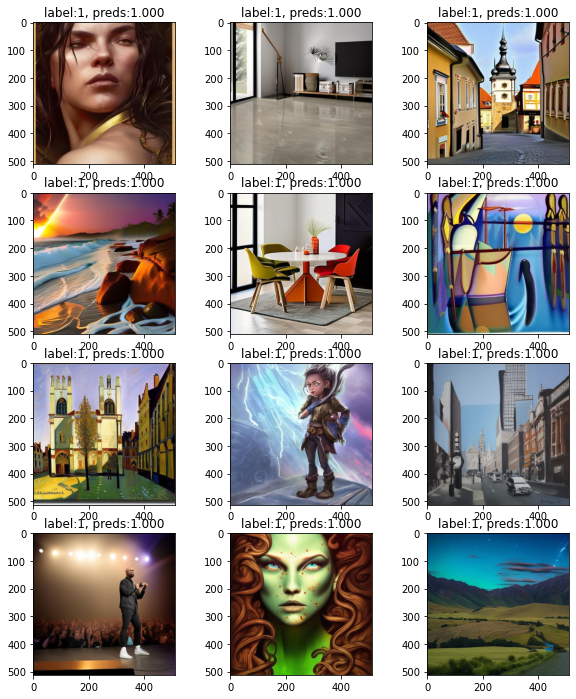

In [11]:
# Best cases
fig, ax = plt.subplots(N_SAMPLES//3, 3, figsize=(10,12))
ax = ax.reshape(-1)

for k,row in enumerate(best_cases.iterrows()):
    image = cv2.imread(row[1]["img_path"])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label = row[1]["label"]
    preds = row[1]["preds"]
    ax[k].imshow(image)
    ax[k].set_title(f"label:{label}, preds:{preds:.3f}")
plt.show()

In [12]:
# Scores per fold
oofs_post = oofs.copy()
oofs_post.loc[oofs_post["preds"]==1, "preds"] -= 0.001

for fold in range(5):
    score = log_loss(
        oofs.loc[oofs["fold"]==fold, "label"],
        oofs.loc[oofs["fold"]==fold, "preds"]
        )
    score_post = log_loss(
        oofs.loc[oofs["fold"]==fold, "label"],
        oofs_post.loc[oofs["fold"]==fold, "preds"]
        )
    print(f"fold{fold}: {score}, {score_post}")

score = log_loss(oofs["label"], oofs["preds"])
score_post = log_loss(oofs["label"], oofs_post["preds"])
print(f"Overall scores: {score}, {score_post}")

fold0: 0.010405807786577249, 0.010852862715439048
fold1: 0.01357301850177492, 0.01405580558540752
fold2: 0.03348143211534753, 0.01911979118276414
fold3: 0.008666094044026108, 0.009159222733825717
fold4: 0.00905701112363723, 0.009478118838577822
Overall scores: 0.015037336063733394, 0.01253350552105622


Why fold2 has so high log loss? Because there are cases where the model is overcofident and predicts 1 but fails. This is heavily penalized by log loss.

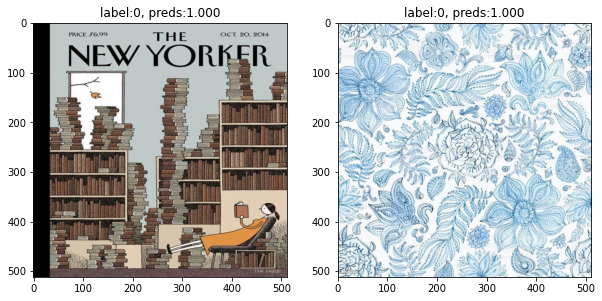

In [13]:
# Images where the model is overconfident (p=1) and wrong
tmp = oofs.loc[(oofs["fold"]==2) & (oofs["abs_dif"]==1)]
fig, ax = plt.subplots(1, 2, figsize=(10,12))
ax = ax.reshape(-1)

for k,row in enumerate(tmp.iterrows()):
    image = cv2.imread(row[1]["img_path"])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label = row[1]["label"]
    preds = row[1]["preds"]
    ax[k].imshow(image)
    ax[k].set_title(f"label:{label}, preds:{preds:.3f}")
plt.show()